In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans, DBSCAN
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from statsmodels.tsa.holtwinters import ExponentialSmoothing

/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation
/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation


**PROFIL** **DATASET**

In [3]:
# PROFILE DATASET
# Load dataset
data_path = '/content/mental health.csv'
data = pd.read_csv(data_path)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# Inspect dataset
print("Dataset Info:")
data.info()
print("Dataset Head:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 8 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             6420 non-null   object 
 1   Code                                                                               6150 non-null   object 
 2   Year                                                                               6420 non-null   int64  
 3   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  6420 non-null   float64
 4   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized     6420 non-null   float64
 5   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized        6420 non

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
Entity                                                                                 0
Code                                                                                 270
Year                                                                                   0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized      0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized         0
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized            0
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized            0
Eating disorders (share of population) - Sex: Both - Age: Age-standardized             0
dtype: int64


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# Describe dataset
print("Dataset Description:")
print(data.describe())

Dataset Description:
              Year  \
count  6420.000000   
mean   2004.500000   
std       8.656116   
min    1990.000000   
25%    1997.000000   
50%    2004.500000   
75%    2012.000000   
max    2019.000000   

       Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
count                                        6420.000000                                   
mean                                            0.266604                                   
std                                             0.039383                                   
min                                             0.188416                                   
25%                                             0.242267                                   
50%                                             0.273477                                   
75%                                             0.286575                                   
max                                         

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**DATA** **PREPROCESSING**

In [8]:
# DATA PREPROCESSING
# Fill missing values if any (example: mean imputation)
if data.isnull().sum().sum() > 0:
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())
print("Missing values handled")

Missing values handled


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Encode categorical variables if necessary
# Identify non-numeric columns
non_numeric_cols = data.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    data = pd.get_dummies(data, columns=non_numeric_cols, drop_first=True)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Feature and target split
# Identify the actual target column in your dataset
target_column = data.columns[-1]  # Assuming the target is the last column; adjust as needed
X = data.drop(target_column, axis=1)
y = data[target_column]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Data Preprocessing Completed")

Data Preprocessing Completed


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**EXPLORATORY** **DATA** **ANALYSIS**

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


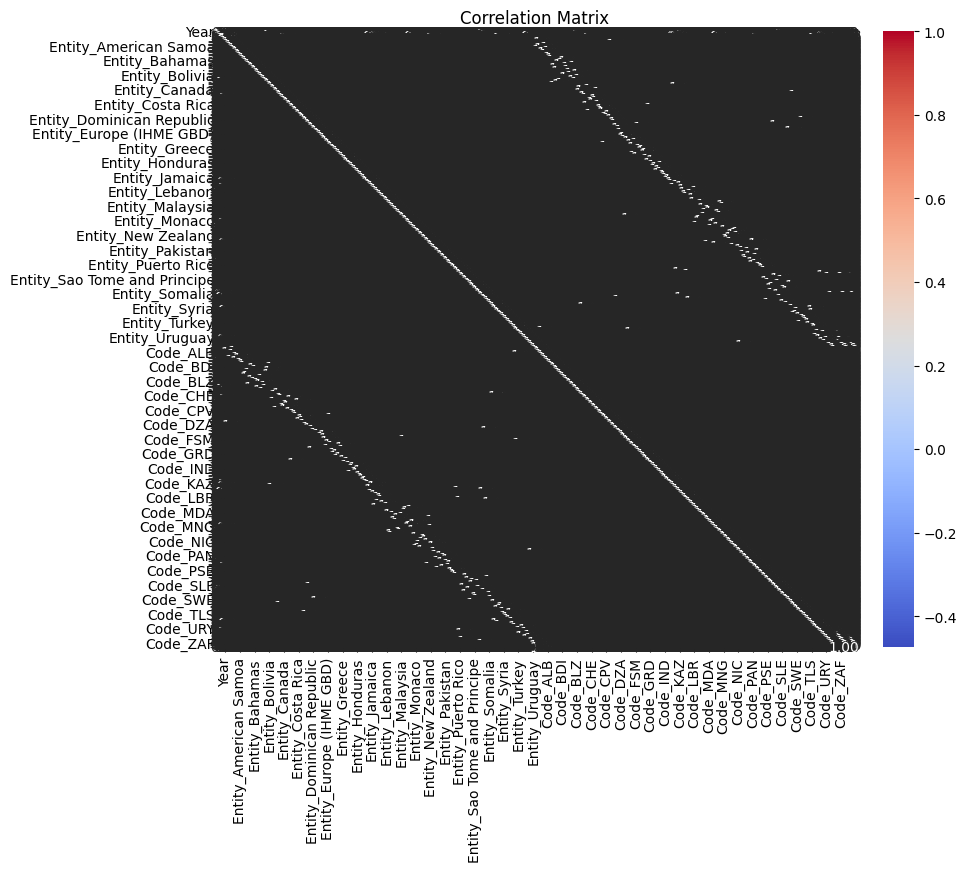

In [13]:
# EXPLORATORY DATA ANALYSIS
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


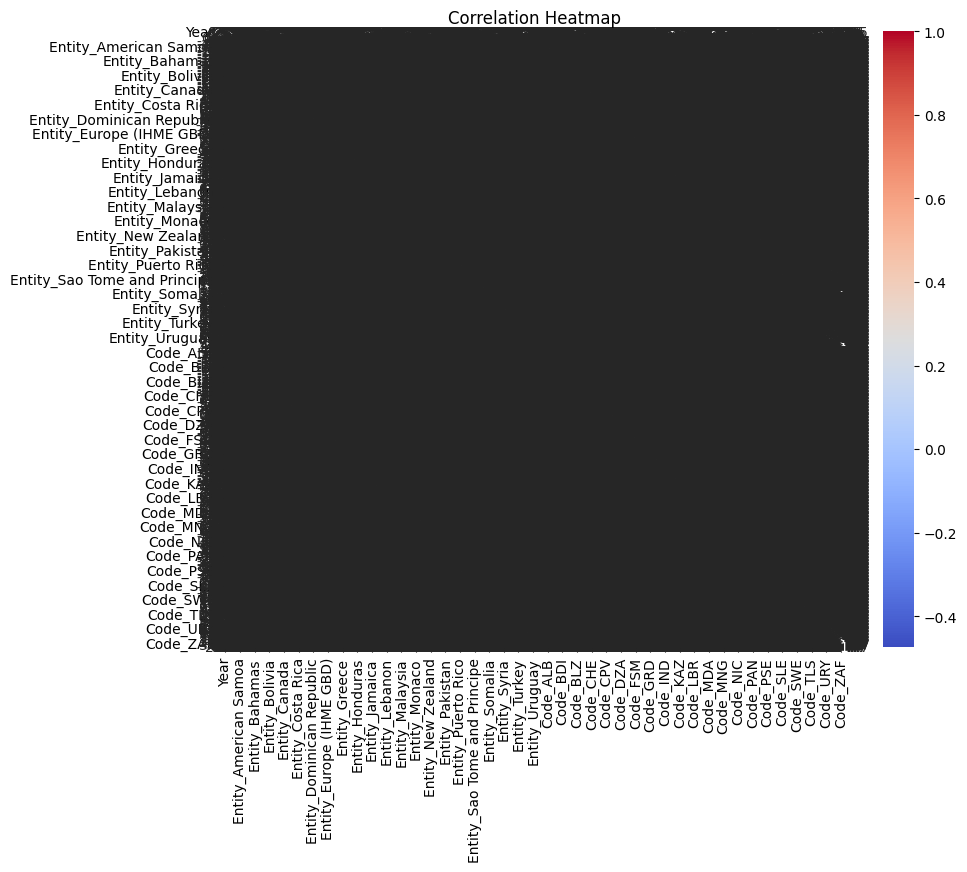

In [14]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


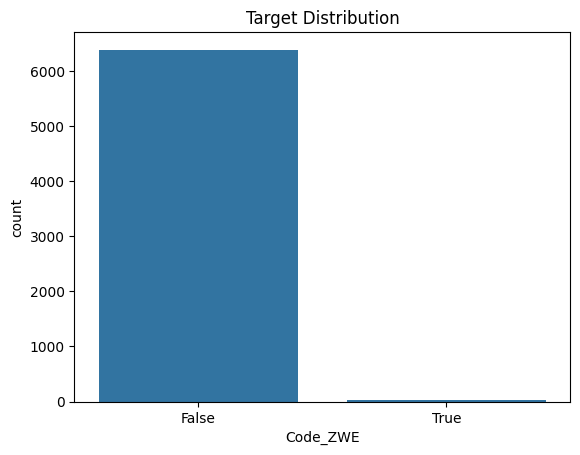

In [15]:
# Distribution of target variable
sns.countplot(x=y)
plt.title('Target Distribution')
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


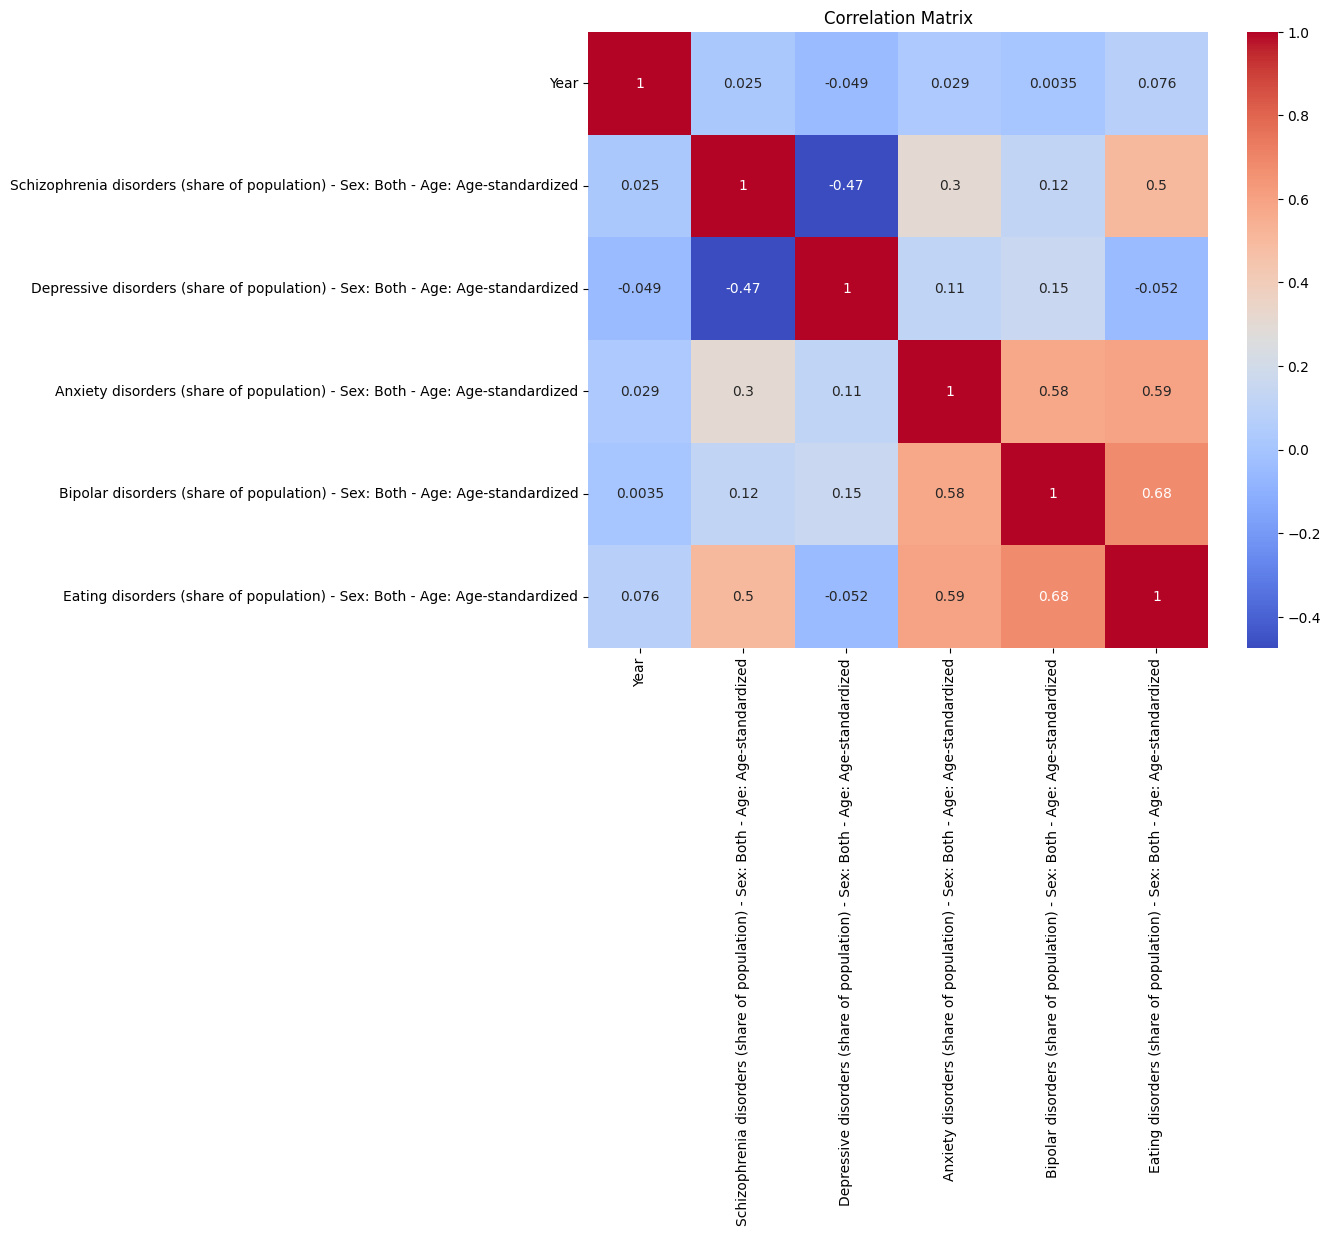

In [16]:
# Correlation matrix
# Exclude non-numeric columns for correlation analysis
numerical_data = data.select_dtypes(include=np.number)
corr_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**SELEKSI** **FITUR**

In [17]:
# SELEKSI FITUR
# Feature selection using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# Selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Year',
       'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Eating disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Entity_Finland', 'Entity_Tokelau', 'Code_FIN', 'Code_TKL'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**MODELING**

In [20]:
# MODELING
# Define a neural network model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_selected.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Apriori (Association Rule Mining)
from mlxtend.frequent_patterns import apriori, association_rules

data_apriori = data.copy()
data_apriori = data_apriori.astype(bool)
frequent_itemsets = apriori(data_apriori, min_support=0.1, use_colnames=True)

# Get the total number of frequent itemsets
total_itemsets = len(frequent_itemsets)

# Now you have num_itemsets, pass it to association_rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=total_itemsets)

print("Apriori Rules:")
print(rules.head())

Apriori Rules:
                                         antecedents  \
0  (Schizophrenia disorders (share of population)...   
1                                             (Year)   
2  (Depressive disorders (share of population) - ...   
3                                             (Year)   
4  (Anxiety disorders (share of population) - Sex...   

                                         consequents  antecedent support  \
0                                             (Year)                 1.0   
1  (Schizophrenia disorders (share of population)...                 1.0   
2                                             (Year)                 1.0   
3  (Depressive disorders (share of population) - ...                 1.0   
4                                             (Year)                 1.0   

   consequent support  support  confidence  lift  representativity  leverage  \
0                 1.0      1.0         1.0   1.0               1.0       0.0   
1                 1.0      1.0 

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


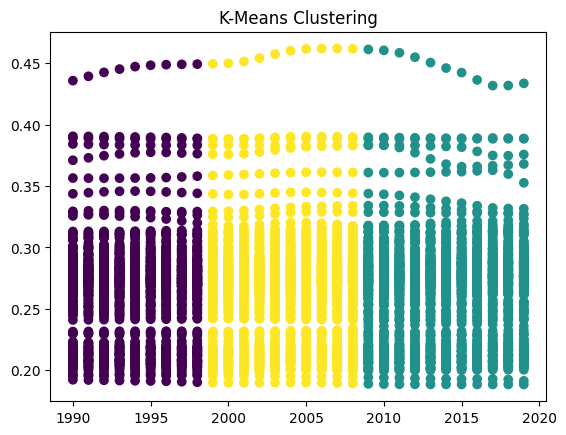

In [24]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


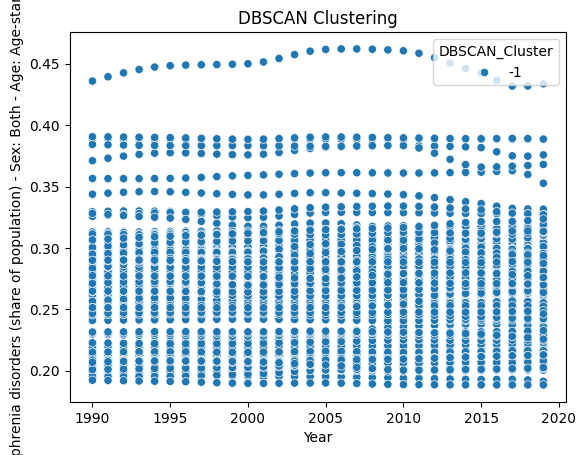

In [25]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(X)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=data['DBSCAN_Cluster'], palette='tab10')
plt.title('DBSCAN Clustering')
plt.show()

In [26]:
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regression_preds = regressor.predict(X_test)
print("Linear Regression Coefficients:")
print(regressor.coef_)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Linear Regression Coefficients:
[ 9.36272684e-19  1.12323345e-16  2.52077005e-17 -1.74556550e-17
  8.25728375e-16 -7.28583860e-17  1.21430643e-17  5.55111512e-17
 -1.50053581e-16 -6.24500451e-17  4.25007252e-17 -1.73472348e-18
  3.49113100e-17 -3.81639165e-17 -6.02816408e-17  3.49113100e-17
  6.46184495e-17 -9.71445147e-17 -2.42861287e-17 -1.19262239e-17
 -5.03069808e-17 -2.77555756e-17  2.51534904e-17 -6.93889390e-18
  5.81132364e-17  6.93889390e-18  1.73472348e-18  6.33174069e-17
 -1.90819582e-17  2.23616698e-17 -3.55618313e-17  5.74627151e-17
 -5.63785130e-18 -3.92389072e-17  7.77957410e-18  1.42655595e-16
 -2.62176602e-16  9.09324280e-18  3.57347319e-17 -8.30682035e-17
 -2.01437140e-17  2.90144519e-18  2.09499835e-17  2.21532732e-17
 -2.16766319e-17  4.55811193e-17 -8.66514705e-19  5.29183834e-19
  1.69919706e-17  4.50894696e-17 -1.92020252e-17  2.96300595e-17
  4.82385263e-19 -3.48997162e-17 -2.42881404e-17  1.97996069e-17
  2.04207732e-17 -9.51768571e-18 -1.90172661e-17 -1.580574

In [27]:
# Neural Network Classification
nn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_selected.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Train the model
history = model.fit(X_train_selected, y_train, epochs=20, batch_size=32, validation_data=(X_test_selected, y_test))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9765 - loss: 0.1824 - val_accuracy: 0.9945 - val_loss: 0.0274
Epoch 2/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9971 - loss: 0.0168 - val_accuracy: 0.9945 - val_loss: 0.0188
Epoch 3/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9961 - loss: 0.0135 - val_accuracy: 0.9945 - val_loss: 0.0133
Epoch 4/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9952 - loss: 0.0116 - val_accuracy: 0.9945 - val_loss: 0.0101
Epoch 5/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9953 - loss: 0.0080 - val_accuracy: 0.9961 - val_loss: 0.0086
Epoch 6/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9978 - loss: 0.0038 - val_accuracy: 0.9953 - val_loss: 0.0068
Epoch 7/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9981 - loss: 0.0048 - val_accuracy: 0.9977 - val_loss: 0.0050
Epoch 8/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9984 - loss: 0.0042 - val_accuracy: 0.9992 - val_

In [29]:
# Save the model
model.save('mental_health_model.h5')
print("Model Saved Successfully")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model Saved Successfully


**EVALUASI** **MODEL**

In [31]:
# EVALUASI MODEL
# Evaluate the model
loss, accuracy = model.evaluate(X_test_selected, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.0364e-04


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Test Accuracy: 1.00


In [32]:
# Confusion matrix
predictions = (model.predict(X_test_selected) > 0.5).astype(int)
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Confusion Matrix:
[[1277    0]
 [   0    7]]


In [33]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1277
        True       1.00      1.00      1.00         7

    accuracy                           1.00      1284
   macro avg       1.00      1.00      1.00      1284
weighted avg       1.00      1.00      1.00      1284



/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
# Supervised Evaluation: Accuracy, Precision, Recall
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
# Unsupervised Evaluation: Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score (K-Means): {silhouette_avg:.2f}")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Silhouette Score (K-Means): 0.49
